In [6]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import os
import mediapy


In [7]:
for k in range(1, 12):
    task_name = "fuck_reviewers_vid_{}".format(k)
    folder = f"assets/reb_demos/new_demos_to_fuck_the_reviewers/{task_name}"
    os.makedirs(f"{folder}/{task_name}", exist_ok=True)
    data = pkl.load(open(f"{folder}/rgbs.pkl", "rb"))
    data = np.array(data)
    rgbs = data[:,:,:,:3]
    rgbs = rgbs[:,:,:,::-1]
    rgbs = np.array(rgbs, dtype=np.uint8)
    mediapy.write_video(f'{folder}/demo_vid.mp4', rgbs, fps=10)
    

    depths = data[:,:,:,3]
    depths = np.array(depths, dtype=np.float32)
    print(rgbs.shape, depths.shape)
    np.save(f"{folder}/rgb.npy", rgbs)
    np.save(f"{folder}/depth.npy", depths)

(67, 480, 640, 3) (67, 480, 640)
(49, 480, 640, 3) (49, 480, 640)
(59, 480, 640, 3) (59, 480, 640)
(39, 480, 640, 3) (39, 480, 640)
(39, 480, 640, 3) (39, 480, 640)
(44, 480, 640, 3) (44, 480, 640)
(55, 480, 640, 3) (55, 480, 640)
(91, 480, 640, 3) (91, 480, 640)
(103, 480, 640, 3) (103, 480, 640)
(44, 480, 640, 3) (44, 480, 640)
(95, 480, 640, 3) (95, 480, 640)


In [36]:
motion_data = pkl.load(open(f"{folder}/motion.pkl", "rb"))

In [29]:
def integrate_motion(accel, gyro, dt, initial_pose):
    # Integrate accelerometer data to compute velocity
    velocity = initial_pose['velocity'] + accel * dt

    # Integrate gyroscope data to compute orientation
    angle = np.linalg.norm(gyro * dt)
    if angle > 0:
        axis = gyro / angle
        rotation = np.eye(3) + np.sin(angle) * np.cross(np.eye(3), axis) + (1 - np.cos(angle)) * np.cross(np.eye(3), axis) @ np.cross(np.eye(3), axis)
    else:
        rotation = np.eye(3)

    # Integrate velocity to compute position
    position = initial_pose['position'] + velocity * dt

    return {
        'velocity': velocity,
        'position': position,
        'orientation': initial_pose['orientation'] @ rotation
    }

In [39]:
initial_pose = {
                    'velocity': np.zeros(3),
                    'position': np.zeros(3),
                    'orientation': np.eye(3)
                }
poses = []
initial_accel = np.array(motion_data[0][0])
initial_gyro = np.array(motion_data[0][1])

for motion in motion_data:
    accel_data_np = np.array(motion[0]) - initial_accel
    gyro_data_np = np.array(motion[1]) - initial_gyro
    dt = .03
    print(accel_data_np)
    current_pose = integrate_motion(accel_data_np, gyro_data_np, dt, initial_pose)
    poses.append(current_pose['position'])
    initial_pose = current_pose



[0. 0. 0.]
[ 0.20593965 -0.16671324  0.38245964]
[0.03922659 0.         0.0294199 ]
[ 0.1569064  -0.12748647  0.22555256]
[-0.0784532  -0.02942014  0.16671276]
[ 0.24516624 -0.1078732   0.12748623]
[ 0.24516624 -0.2451663   0.0882597 ]
[ 0.28439283 -0.3824594   0.666852  ]
[-0.0588399  -0.1863265   0.45110607]
[ 0.1176798  -0.08825994  0.06864643]
[-0.1569064   0.25497293  0.20593929]
[ 0.60801226  0.17651963 -0.17651939]
[ 0.03922659  0.6374321  -0.42168617]
[ 0.51975244  0.53936577 -0.09806633]
[0.44129926 0.46091247 0.20593929]
[ 0.59820563  0.48052573 -0.1176796 ]
[0.80414522 0.46091247 0.        ]
[0.78453195 0.51975226 0.0882597 ]
[ 0.86298513  0.6374321  -0.03922653]
[ 0.78453195  0.75511193 -0.21574688]
[1.02969825 0.5785923  0.16671276]
[ 0.51975244  0.73549867 -0.07845306]
[0.48052585 0.55897903 0.0294199 ]
[0.38245934 0.6374321  0.26477909]
[0.46091253 0.55897903 0.        ]
[ 0.42168593  0.65704536 -0.1176796 ]
[0.40207261 0.73549867 0.0882597 ]
[0.6864655  0.73549867 0.029

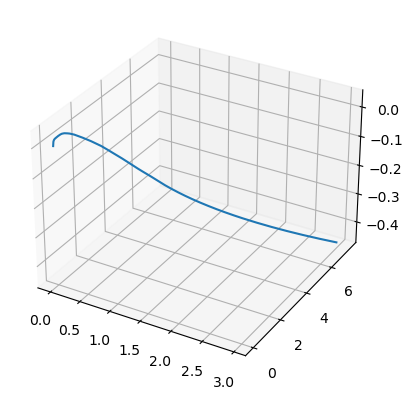

In [40]:
# plot position in 3D
poses = np.array(poses)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(poses[:,0], poses[:,1], poses[:,2])
plt.show()

